In [2]:
import pandas as pd
import seaborn as sns

In [2]:
#read in dataset
happy = pd.read_csv('HappinessAlcoholConsumption.csv' )
happy.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [11]:
happy.Hemisphere.value_counts()

north    96
south    21
both      5
Name: Hemisphere, dtype: int64

In [8]:
happy[happy.Hemisphere == "noth"]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
46,Japan,Eastern Asia,noth,5.921,907,38.972,77,202,16
51,South Korea,Eastern Asia,noth,5.835,900,27.105,140,16,9
70,China,Eastern Asia,noth,5.245,748,8.117,79,192,8
84,Mongolia,Eastern Asia,noth,4.907,743,3.694,77,189,8


In [10]:
happy['Hemisphere'] = happy.Hemisphere.replace('noth', "north")

In [16]:
happy['Region'] = happy.Region.replace({'Western Europe': 'Europe', 'Middle East and Northern Africa': 'Africa',\
                                     'Latin America and Caribbean':'South America',  'Southeastern Asia':'Asia',\
                                       'Central and Eastern Europe': 'Europe','Eastern Asia': 'Asia', 'Sub-Saharan Africa':'Africa' })                                      

In [18]:
happy = happy[happy['Hemisphere'] != 'both']

In [20]:
happy.Hemisphere.unique()

array(['north', 'south'], dtype=object)

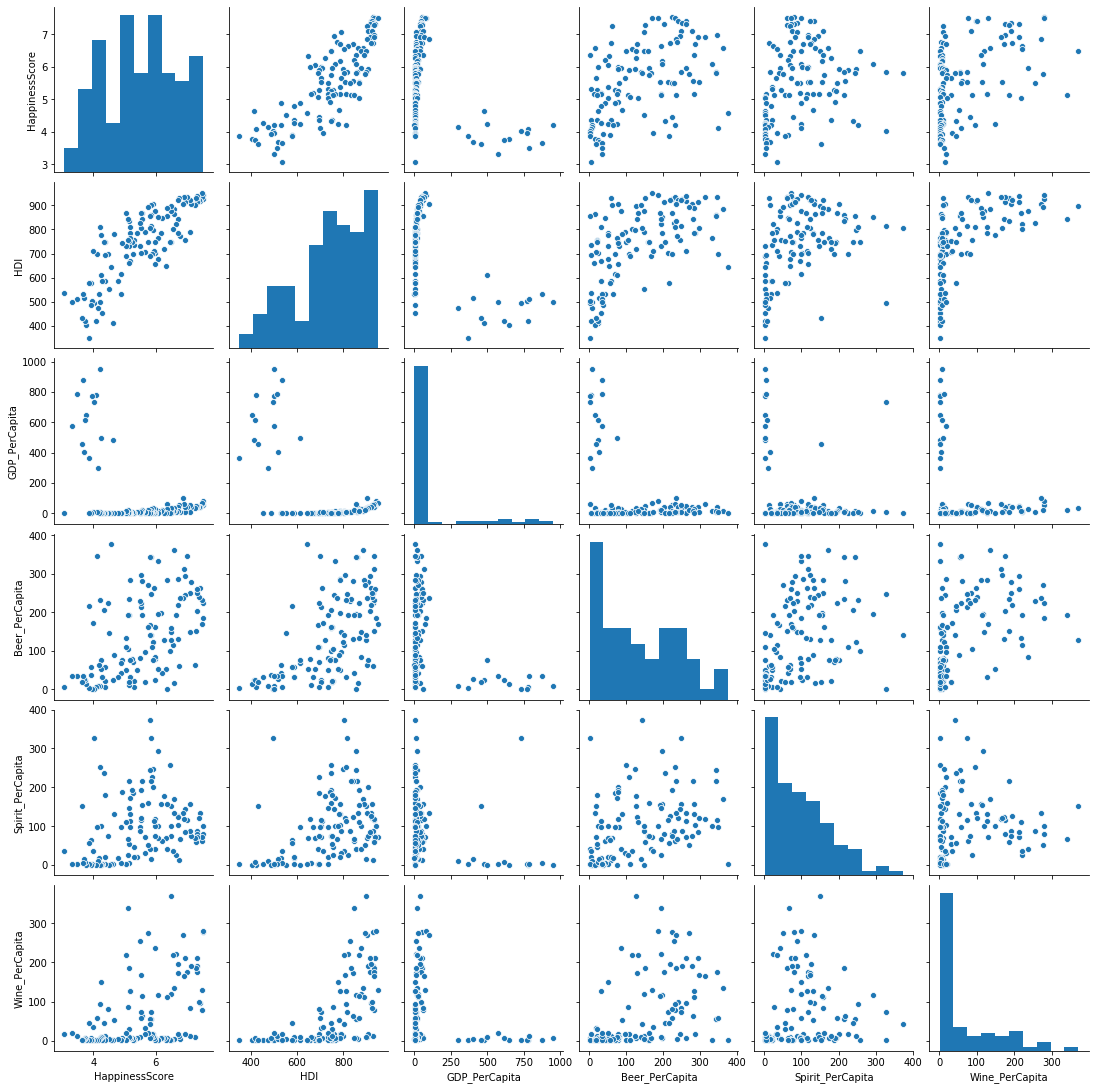

In [3]:
sns.pairplot(happy)

In [24]:
import statsmodels.formula.api as smf

model = smf.ols('HappinessScore ~ HDI', happy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     236.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.09e-29
Time:                        17:06:27   Log-Likelihood:                -117.09
No. Observations:                 117   AIC:                             238.2
Df Residuals:                     115   BIC:                             243.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8893      0.306      2.902      0.004       0.282       1.496
HDI            0.0062      0.000     15.387      0.000       0.005       0.007
==============================================================================
Omnibus:                        3.463   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                2.745
Skew:                          -0.249   Prob(JB):                        0.254
Kurtosis:                       2.438   Cond. No.                     3.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
cust = pd.read_csv('Ecommerce_Customers.csv')

In [31]:
cust.rename(['Email', 'Address', 'Avatar', "Avg_session_length", 'Time_on_app', "Length_of_membership", "Yearly_amount_spent"], axis='columns')

TypeError: 'list' object is not callable

In [35]:
cust = cust.rename(columns={'Avg. Session Length': 'Avg_session_length','Time on App':"Time_on_app", \
                     "Time on Website": "Time_on_website", "Length of Membership":'Length_of_membership',\
                     "Yearly Amount Spent": "Yearly_amount_spent"})

In [38]:
model = smf.ols('Yearly_amount_spent ~ Time_on_app + Time_on_website', cust).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly_amount_spent   R-squared:                       0.251
Model:                             OLS   Adj. R-squared:                  0.248
Method:                  Least Squares   F-statistic:                     83.39
Date:                 Sun, 31 May 2020   Prob (F-statistic):           5.91e-32
Time:                         17:45:09   Log-Likelihood:                -2823.3
No. Observations:                  500   AIC:                             5653.
Df Residuals:                      497   BIC:                             5665.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         143.9397    116.395      1.237      0.217     -84.747     372.627
Time_on_app        40.1242      3.107     12.914      0.000      34.020      46.229
Time_on_website    -3.4598      3.057     -1.132      0.258      -9.466       2.546
==============================================================================
Omnibus:                        4.252   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                4.747
Skew:                          -0.103   Prob(JB):                       0.0932
Kurtosis:                       3.431   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
cust.to_csv('Ecommerce_Customers.csv')


In [40]:
happy.to_csv('HappinessAlcoholConsumption.csv')